In [1]:
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,f1_score

In [2]:
# lets load the dataset----->>
data=pd.read_csv(r"D:\AIML\dataset\loanData.csv", on_bad_lines='skip')
print(data.head())

  Employee ID  Salary (Monthly)  Experience (Years)    Job Role  \
0      EMP001             45000                   2  Sales Exec   
1      EMP002             85000                   7     Manager   
2      EMP003             30000                   1      Intern   
3      EMP004             60000                   4   Developer   
4      EMP005             55000                   3          HR   

   Work Hours (Weekly)  Satisfaction Level (0-1) Attrition (Target)  
0                   45                       0.3                Yes  
1                   40                       0.8                 No  
2                   50                       0.4                Yes  
3                   42                       0.7                 No  
4                   48                       0.2                Yes  


In [3]:
#drop the unusual feature--->
data=data.drop(columns=['Employee ID'])

In [4]:
# dseparate the features--->
x=data.drop(columns='Attrition (Target)')
y = data["Attrition (Target)"].map({"Yes": 1, "No": 0})

In [5]:
# lets make teh coloumn transfor--------------->
numeric_features = [
    "Salary (Monthly)",
    "Experience (Years)",
    "Work Hours (Weekly)",
    "Satisfaction Level (0-1)"
]

categorical_features = ["Job Role"]

In [6]:
#preprocessor = ColumnTransformer(
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_features),
        ("cat", OneHotEncoder(handle_unknown="ignore", drop="first"), categorical_features)
    ]
)

In [7]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier",LogisticRegression( penalty='l2',
    C=1.5,
    solver='lbfgs',
    max_iter=200,
    class_weight='balanced'))
    ]
)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42
)

In [9]:
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('classifier', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [10]:
y_pred = model.predict(X_test)
x_pred = model.predict(X_train)

c:\Users\harip\.conda\envs\myenv\Lib\site-packages\sklearn\preprocessing\_encoders.py:246: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [11]:
print("Accuracy on test data:", accuracy_score(y_test, y_pred))
print("Accuracy on train data:", accuracy_score(y_train,x_pred))


Accuracy on test data: 0.75
Accuracy on train data: 1.0


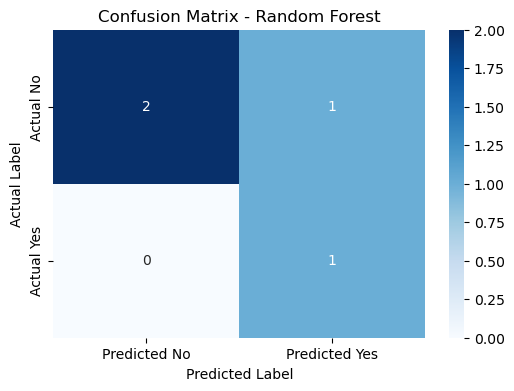

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["Predicted No", "Predicted Yes"],
    yticklabels=["Actual No", "Actual Yes"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Confusion Matrix - Random Forest")
plt.show()

